# Skinned Isogrid Plate
Worked from 4.10.3, on pages 4.10.010 - 4.10.011
Circular isogrid plate under pressure

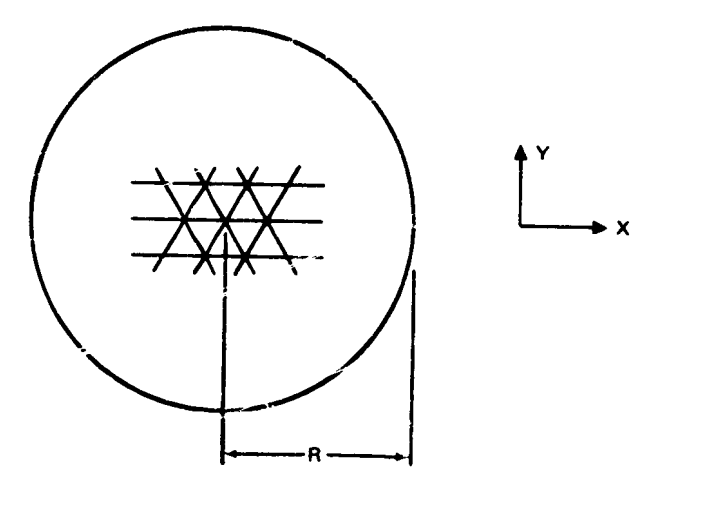

In [2]:
from IPython.display import Image
Image(filename='example_4.10.3.png') 

In [7]:
import math

# Inputs
R = 36.0
q = 3.0
delta = 10
alpha = 0.2
flanges = False

# Material properties
E = 10.7*10**6 # Young's Modules
F_tu = 60.0 # Ultimate Tensile Strength - ksi
nu = 0.33

# Find Maximum Stress at Center of the Plate
Mx = (3 + nu)/16*q*R**2 # lb-in
print('Maximum bending moment at the center of the plate')
print('Mx = {:5.3f} lb in'.format(Mx))

# Note: The example uses the tables to find k1 and k2. Since we have somewhat
# more compute power than the 1960s, we just solve directly
if flanges == False:
    beta = (3*alpha*(1+delta)**2+(1+alpha)*(1+alpha*delta**2))**0.5
k1 = beta**2/(2*alpha+alpha*delta+1)
k2 = beta**2/(2*delta+alpha*delta+1)

print('\nMaterial Non-dimensional Parameters')    
print('Alpha: {:5.3f}'.format(alpha))
print('Delta: {:5.3f}'.format(delta))
print('Beta: {:5.3f}'.format(beta))

print('\nk1: {:5.3f}'.format(k1))
print('k2: {:5.3f}'.format(k2))

print('\nSection Moduli')
print('S1: -{:5.3f}*t^2'.format(k1/6.0))
print('S2:  {:5.3f}*t^2'.format(k2/6.0))

# sigma = - 1 / S1 * Mx (4.10.13)

t_squared = (2/3)*Mx/(k2/6.0*F_tu*1000)
t = t_squared**0.5
print('\nt^2 = {:5.4f}'.format(t_squared))
print('t = {:5.4f}'.format(t))
d = delta*t
print('d = {:5.4f}'.format(d))

b = d/10 # Assumption made for example
print('b = {:5.4f}'.format(b))

h = delta/alpha*b
print('h = {:5.4f}'.format(h))

# Grid Size
a = h/math.sin(math.pi/3)
print('a = {:5.4f}'.format(a))

# Check Skin Stresses
# Assumes skin in is compresssion (buckling)
S1 = -(k1/6)*t**2
sigma_skin = - Mx/S1
sigma_crit = (math.pi**2)/(1-nu**2)*E*(t/a)**2
print('\nChecking Skin Stress')
print('Skin Stress {:5.3f} psi'.format(sigma_skin))
print('Skin Crit Stress {:5.3f} psi'.format(sigma_crit))

if sigma_skin < sigma_crit :
    print('Success! Skin Stress is less than Critical Stress')
else:
    print('WARNING! Skin Stress is greater than Critical Stress!')
    
t_bar = t*(1+3*alpha)
print('\nEquivalent weight thickness (t_bar): {:5.4f}'.format(t_bar))

Maximum bending moment at the center of the plate
Mx = 809.190 lb in

Material Non-dimensional Parameters
Alpha: 0.200
Delta: 10.000
Beta: 9.889

k1: 28.765
k2: 4.252

Section Moduli
S1: -4.794*t^2
S2:  0.709*t^2

t^2 = 0.0127
t = 0.1126
d = 1.1264
b = 0.1126
h = 5.6318
a = 6.5030

Checking Skin Stress
Skin Stress 13304.348 psi
Skin Crit Stress 35553.170 psi
Success! Skin Stress is less than Critical Stress

Equivalent weight thickness (t_bar): 0.1802
